This document will analyze the aggregated data from five subsets and ten subsets according to the pH attribute and the highest density.

C:\Users\mridr\AppData\Local\Temp\ipykernel_12844\2374847520.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(categories).size()
C:\Users\mridr\AppData\Local\Temp\ipykernel_12844\2374847520.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(categories).size()


5-bin densities:
 pH
(2.719, 2.978]     1356.589147
(2.978, 3.236]    12961.240310
(3.236, 3.494]     9554.263566
(3.494, 3.752]     1248.062016
(3.752, 4.01]        62.015504
dtype: float64
Highest density (5 bins): (2.978, 3.236] -> 12961.240310077525

10-bin densities:
 pH
(2.719, 2.849]      124.031008
(2.849, 2.978]     2589.147287
(2.978, 3.107]     9558.139535
(3.107, 3.236]    16364.341085
(3.236, 3.365]    12891.472868
(3.365, 3.494]     6217.054264
(3.494, 3.623]     2038.759690
(3.623, 3.752]      457.364341
(3.752, 3.881]       93.023256
(3.881, 4.01]        31.007752
dtype: float64
Highest density (10 bins): (3.107, 3.236] -> 16364.341085271324


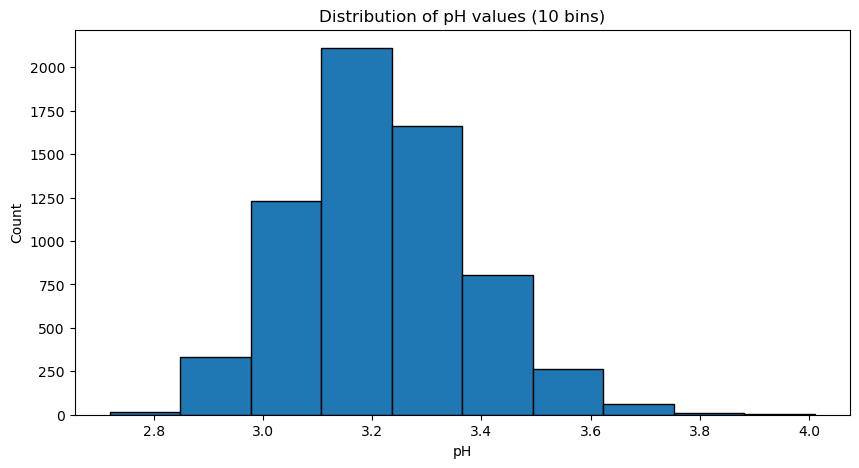

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

red_wine = pd.read_excel('data/winequality-red.xlsx', header=1)
white_wine = pd.read_excel('data/winequality-white.xlsx', header=1)

# Combine into one DataFrame
df = pd.concat([red_wine, white_wine], ignore_index=True)

# Function to compute bin densities
def compute_bin_densities(df, bins):
    # Cut pH values into bins
    categories = pd.cut(df['pH'], bins=bins)
    # Count how many values fall into each bin
    counts = df.groupby(categories).size()
    # Compute bin width
    bin_width = (df['pH'].max() - df['pH'].min()) / bins
    # Density = count / bin width
    densities = counts / bin_width
    return densities

# Split into 5 bins
densities_5 = compute_bin_densities(df, 5)
print("5-bin densities:\n", densities_5)
print("Highest density (5 bins):", densities_5.idxmax(), "->", densities_5.max())

# Split into 10 bins
densities_10 = compute_bin_densities(df, 10)
print("\n10-bin densities:\n", densities_10)
print("Highest density (10 bins):", densities_10.idxmax(), "->", densities_10.max())

# Plot histogram for visualization
plt.figure(figsize=(10,5))
plt.hist(df['pH'], bins=10, edgecolor='black')
plt.xlabel("pH")
plt.ylabel("Count")
plt.title("Distribution of pH values (10 bins)")
plt.show()

